Saving TAK.csv to TAK (5).csv


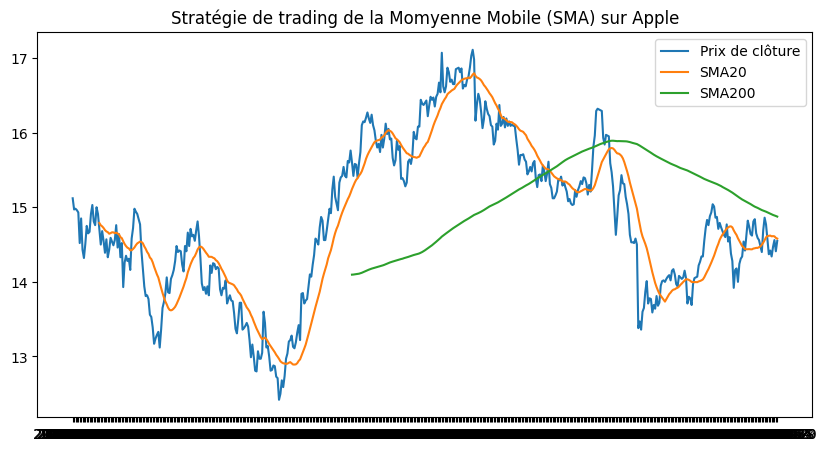

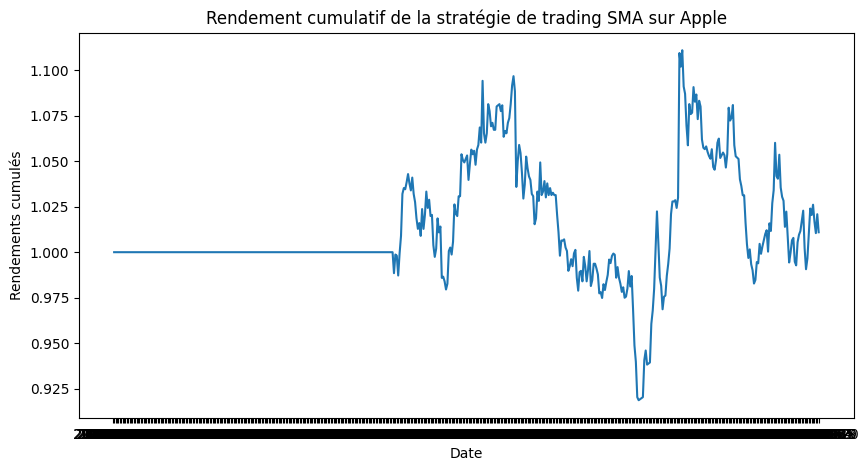

In [9]:
# Le programme porte sur l'actif TAKEDA en premier lieu.
# Nous le comparons directement avec la stratégie de trading de Apple.
# Vous pouvez la comparer à d'autres actifs, cependant il faudra juste changer le nom du fichier indiqué par la petite flèche
# Liste des fichiers à joindre si changement :
# TAK.csv ; TM.BA.csv ; AJI.MU.csv et SONY.csv joint sur le PowerPoint
# Si le programme ne fonctionne pas, allez dans éxécution -> déconnecter et supprimer l'environnement d'éxécution -> oui -> puis relancer le programme

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Lecture des données

uploaded = files.upload()

data = pd.read_csv("TAK.csv") # <-<-<-<-<-<-<-<-<-<-<-<-<-<-<-<-<-<-<-<-<-<-<-<-

# Régle et stratégies de décision
# SMA20 = Moyenne Mobile 20 points
# SMA200 = Moyenne Mobile 40 points

data['SMA20'] = data['Close'].rolling(window=20).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()

data['Signal'] = 0
data.loc[data['SMA20'] > data['SMA200'], 'Signal'] = 1  # acheter
data.loc[data['SMA20'] < data['SMA200'], 'Signal'] = -1  # vendre

data['Rendement'] = data['Close'].pct_change() * data['Signal'].shift(1)
data['Rendements cumulatifs'] = (1 + data['Rendement']).cumprod()

# Grpahiques

plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Close'], label='Prix de clôture')
plt.plot(data['Date'], data['SMA20'], label='SMA20')
plt.plot(data['Date'], data['SMA200'], label='SMA200')
plt.title('Stratégie de trading de la Momyenne Mobile (SMA) sur Apple')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Rendements cumulatifs'])
plt.title('Rendement cumulatif de la stratégie de trading SMA sur Apple')
plt.xlabel('Date')
plt.ylabel('Rendements cumulés')
plt.show()


In [1]:
!apt-get install mysql-server > /dev/null
!service mysql start
!mysql -e "ALTER USER 'root'@'localhost' IDENTIFIED WITH mysql_native_password BY '!*L3_ECO*!'"
!pip install mysql-connector-python

 * Starting MySQL database server mysqld
su: warning: cannot change directory to /nonexistent: No such file or directory
   ...done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 60.0 MB/s eta 0:00:00
